In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt 
from sklearn.model_selection import cross_val_predict  
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from time import time
import os



Loading Data into Pandas dataframe

In [79]:
df=pd.read_csv("D:\DS Projects\insurance\insurance.csv")

In [80]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [81]:
df.shape

(1338, 7)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [83]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [84]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [85]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [86]:
df1=df

In [87]:
df1['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [88]:
df1.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:title={'center':'Distribution Of Age'}, xlabel='age', ylabel='Count'>

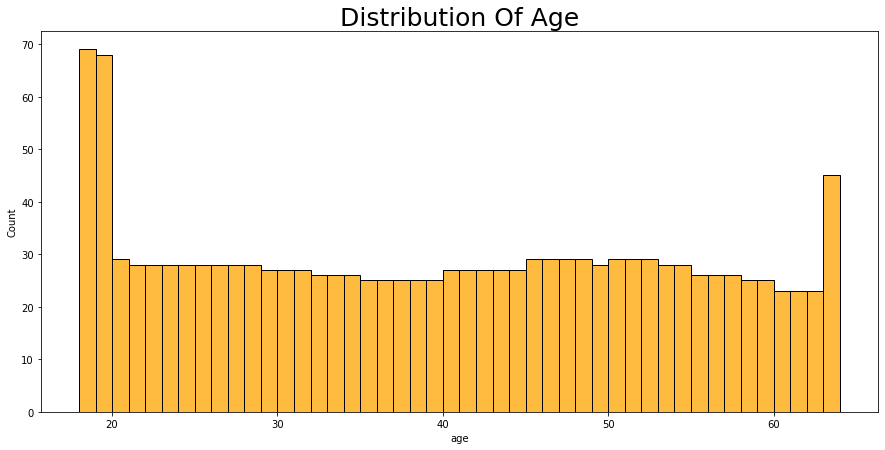

In [89]:
plt.figure(figsize=(15,7))
plt.title("Distribution Of Age",fontsize=25)
sns.histplot(x='age',data=df1,bins=46,color='orange')

Text(0, 0.5, 'Frequency')

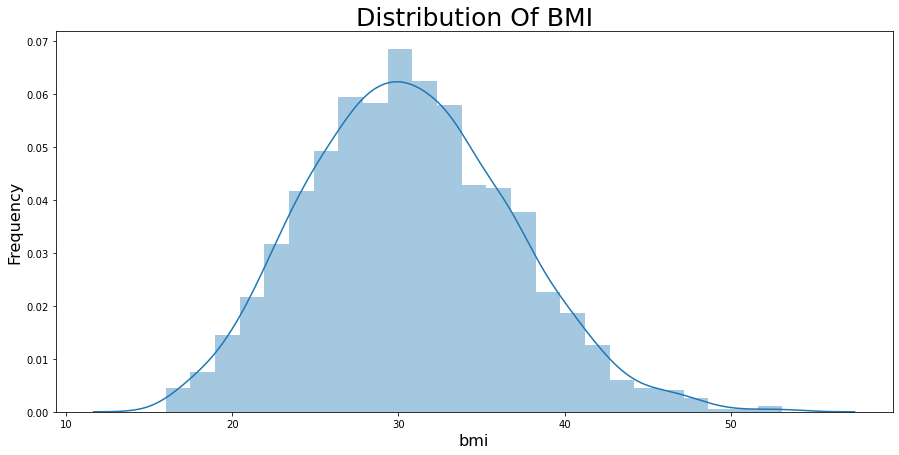

In [90]:
plt.figure(figsize=(15,7))
plt.title("Distribution Of BMI",fontsize=25)
g=sns.distplot(df1['bmi'])
g.set_xlabel("bmi", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)

<AxesSubplot:xlabel='bmi'>

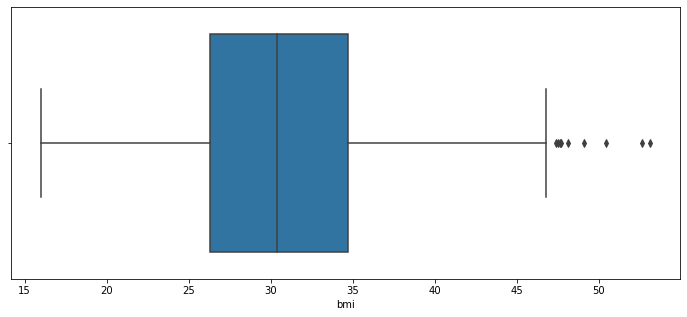

In [91]:
plt.figure(figsize=(12,5))
sns.boxplot(x='bmi',data=df1)

<AxesSubplot:xlabel='expenses', ylabel='Count'>

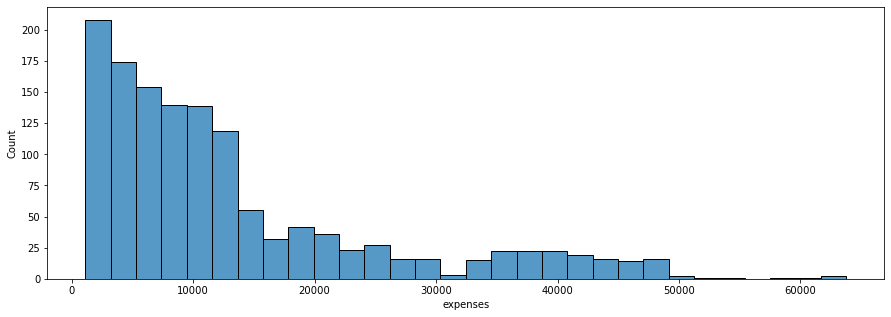

In [92]:
plt.figure(figsize=(15,5))
sns.histplot(x='expenses',data=df1)


<AxesSubplot:xlabel='age', ylabel='expenses'>

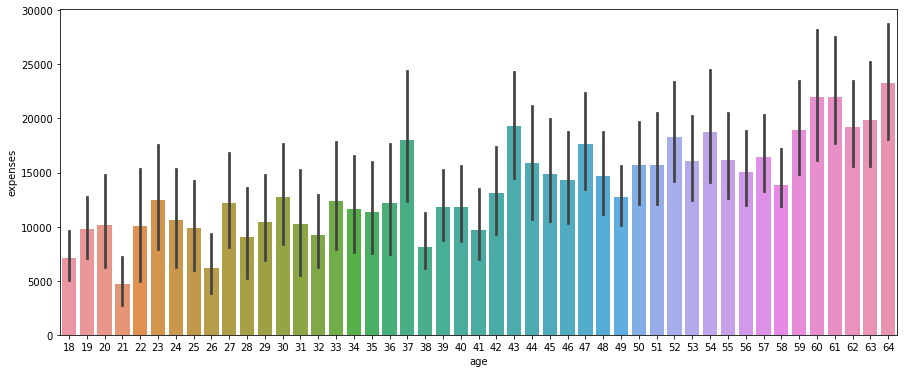

In [93]:
plt.figure(figsize=(15,6))
sns.barplot(x='age',y='expenses',data=df1)

<AxesSubplot:xlabel='smoker', ylabel='count'>

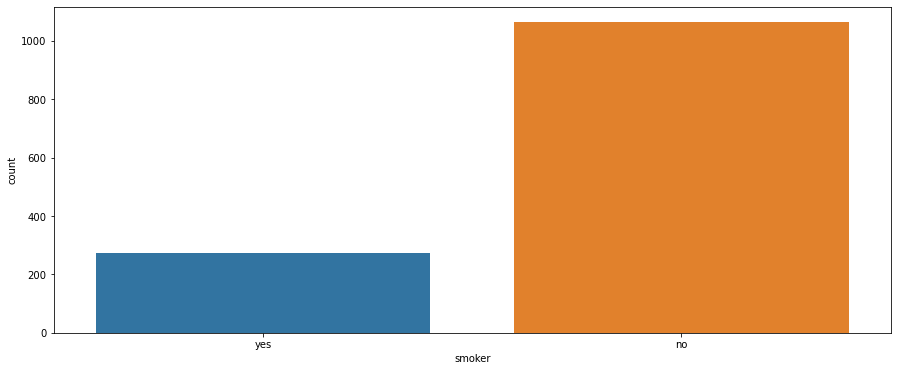

In [94]:
plt.figure(figsize=(15,6))
sns.countplot(x='smoker',data=df1)

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

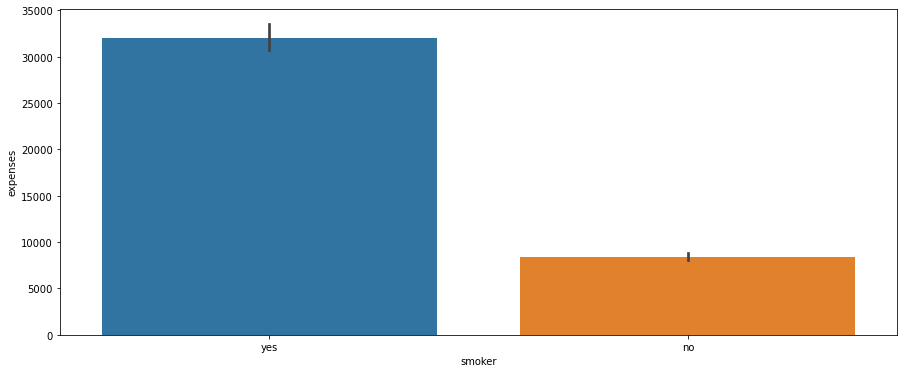

In [95]:
plt.figure(figsize=(15,6))
sns.barplot(x='smoker',y='expenses',data=df1)

From above barplot we conclude that smokers has more expenses then non smokers.

<AxesSubplot:xlabel='children', ylabel='expenses'>

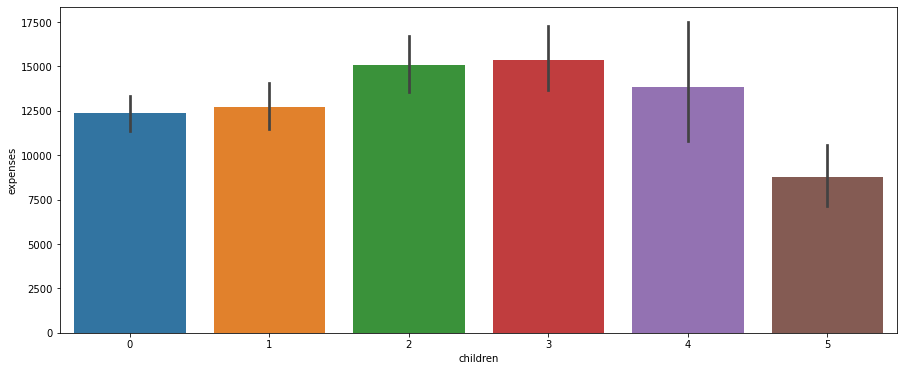

In [96]:
plt.figure(figsize=(15,6))
sns.barplot(x='children',y='expenses',data=df1)


<AxesSubplot:xlabel='region', ylabel='expenses'>

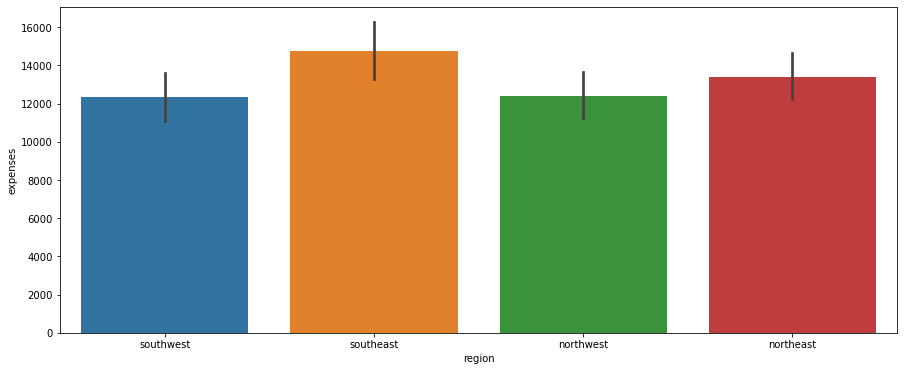

In [97]:
plt.figure(figsize=(15,6))
sns.barplot(x='region',y='expenses',data=df1)

<AxesSubplot:xlabel='smoker', ylabel='count'>

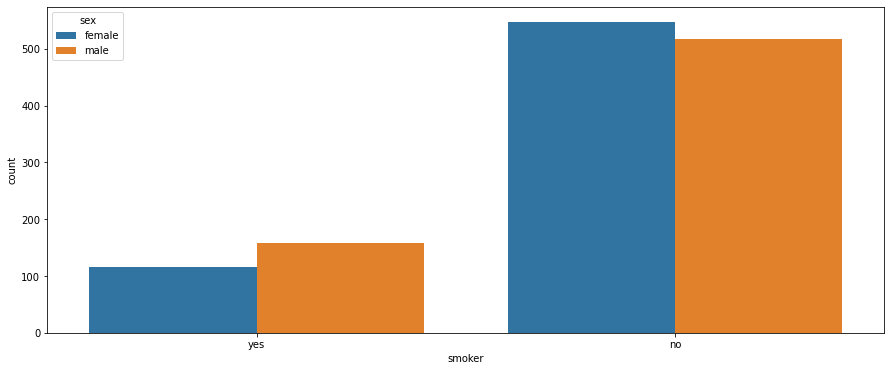

In [98]:
plt.figure(figsize=(15,6))
sns.countplot(x=df1.smoker,hue=df1.sex)

From above countplot we conclude that no of smoker are more in male category.

<AxesSubplot:xlabel='age', ylabel='expenses'>

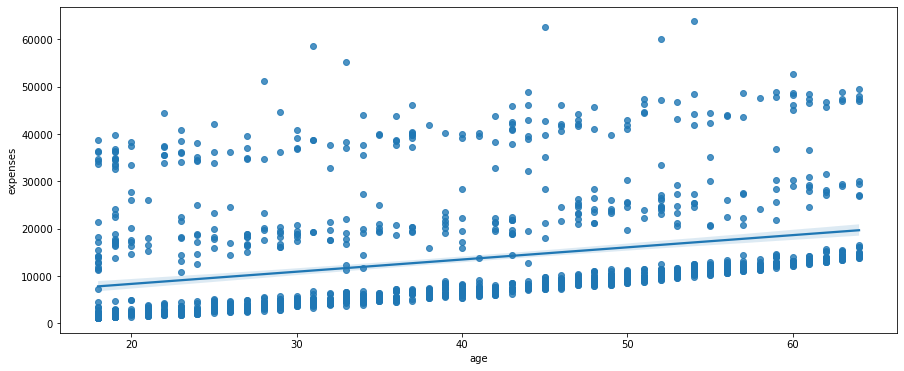

In [99]:
plt.figure(figsize=(15,6))
sns.regplot(x='age',y='expenses',data=df1)

From above regression polot we conclude that expenses rises with age.

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

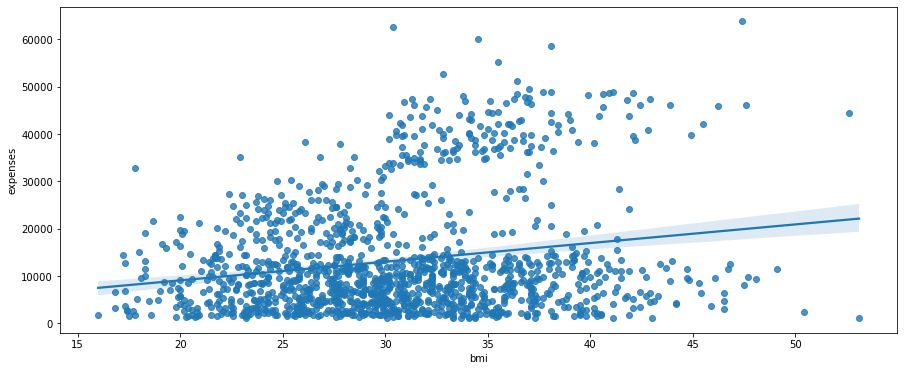

In [100]:
plt.figure(figsize=(15,6))
sns.regplot(x='bmi',y='expenses',data=df1)

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

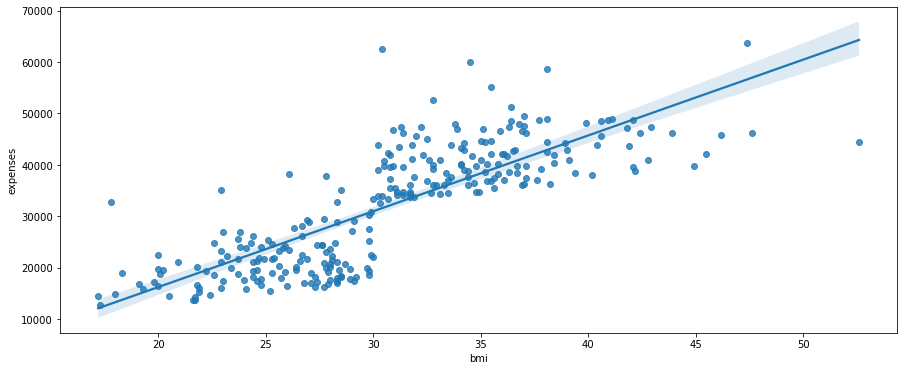

In [101]:
#smokers bmi vs expenses
plt.figure(figsize=(15,6))
smokers_bmi=df1[df1['smoker']=='yes']
sns.regplot(x='bmi',y='expenses',data=smokers_bmi)

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

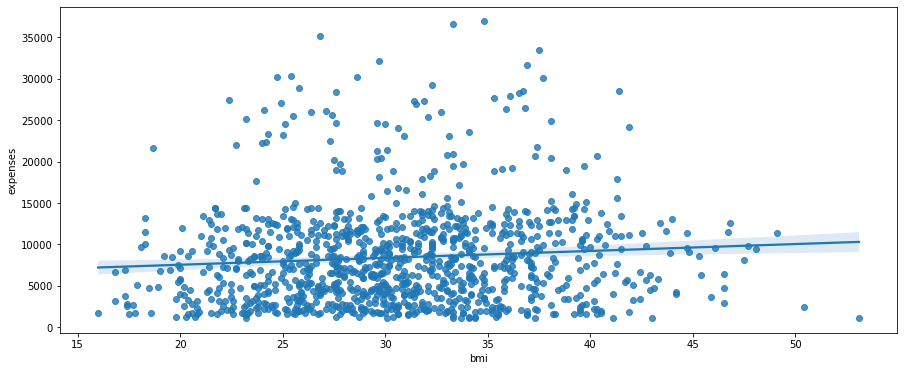

In [102]:
#non smokers bmi vs expenses
plt.figure(figsize=(15,6))
non_smokers_bmi=df1[df1['smoker']=='no']
sns.regplot(x='bmi',y='expenses',data=non_smokers_bmi)


expenses increases with respect to bmi if the person is smoker

In [103]:
isSmoker=(df1['smoker']=='yes')
notsmoker=(df1['smoker']=='no')


In [104]:
df1.loc[isSmoker,'smoker']=1
df1.loc[notsmoker,'smoker']=0

In [105]:
df1.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,1,southwest,16884.92
1,18,male,33.8,1,0,southeast,1725.55
2,28,male,33.0,3,0,southeast,4449.46
3,33,male,22.7,0,0,northwest,21984.47
4,32,male,28.9,0,0,northwest,3866.86


In [106]:
SEregion=(df1['region']=='southeast')
SWregion=(df1['region']=='southwest')
NWregion=(df1['region']=='northwest')
NEregion=(df1['region']=='northeast')


In [107]:
df1.loc[SEregion,'region']=1
df1.loc[SWregion,'region']=2
df1.loc[NWregion,'region']=3
df1.loc[NEregion,'region']=4

In [108]:
men=(df1['sex']=='male')
women=(df1['sex']=='female')


In [109]:
df1.loc[men,'sex']=1
df1.loc[women,'sex']=0

In [110]:
convert_dict={'sex':float,'smoker':float,'region':float}

In [111]:
df1=df1.astype(convert_dict)

In [112]:
df1.expenses.corr(df1.smoker)

0.7872514298985526

In [113]:
df1.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,-0.012816,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,-0.262750,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262750,0.001205,-0.038873,1.000000,-0.039473
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.039473,1.000000


In [114]:
cor=df1.corr()

<AxesSubplot:>

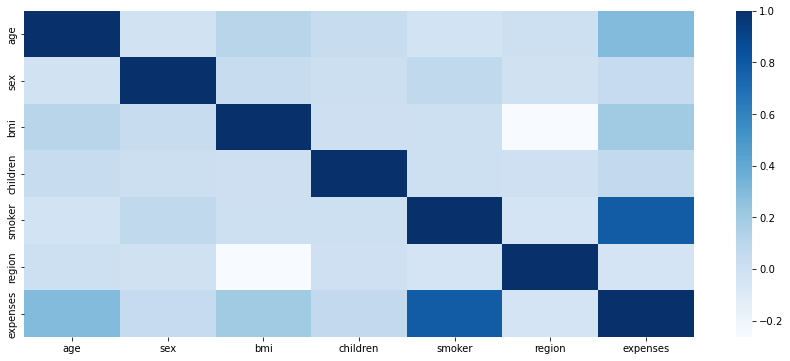

In [115]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,fmt='.1g',cmap='Blues')


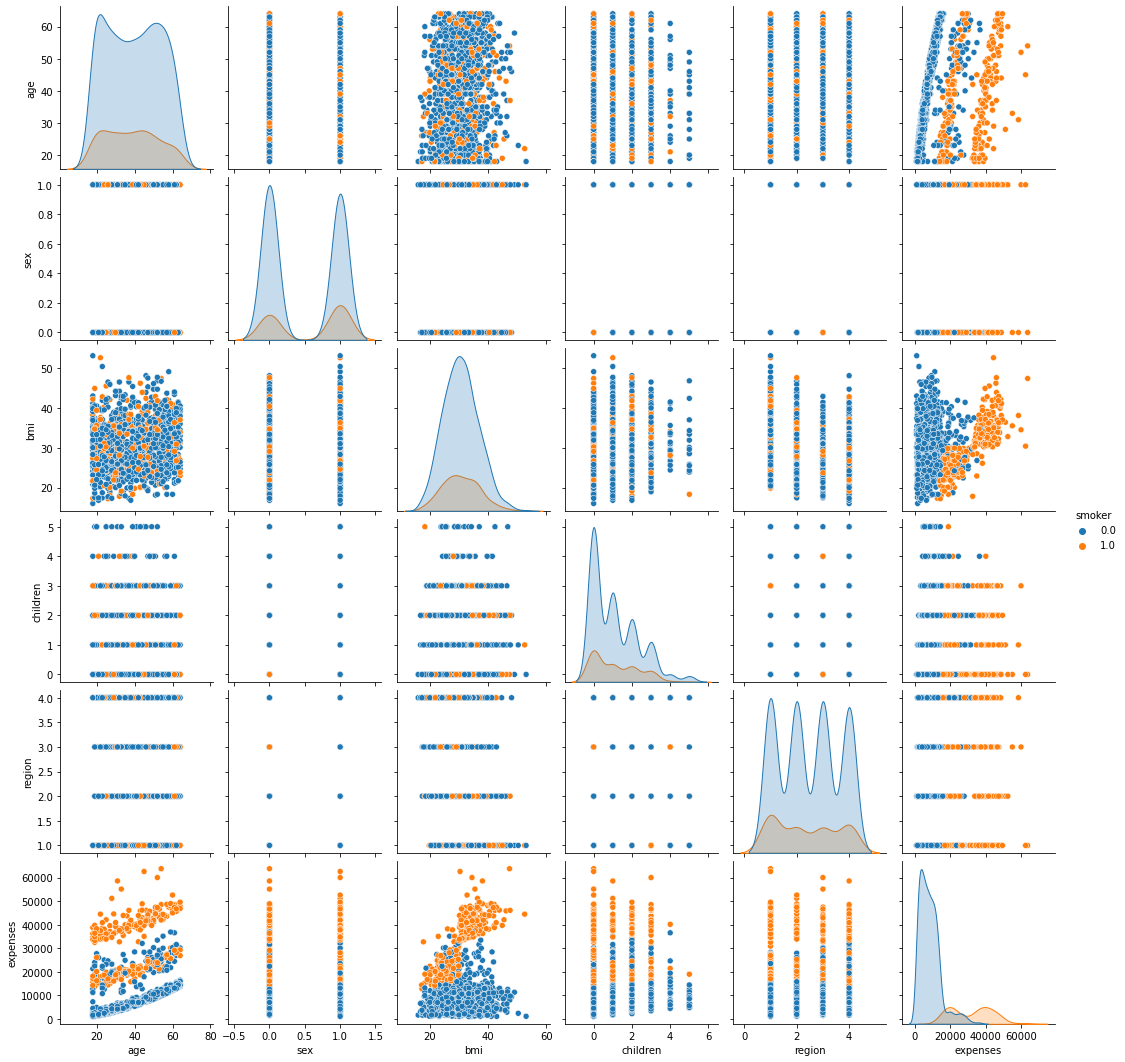

In [116]:
sns.pairplot(data=df1,hue='smoker')

In [117]:
X=df1.drop(['expenses'],axis=1)
Y=df1['expenses']

In [118]:
# Creating new variables for numerical attributes/columns
numeric_features = ['age', 'bmi', 'children']
# Making pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['sex', 'smoker','region']
# MAking pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [119]:
Y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [120]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: expenses
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


In [121]:

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

Comparing all the Algorithms

In [135]:
mul_regressors = [
    Pipeline(steps=[('preprocessor', preprocessor),
                ('knn', KNeighborsRegressor(n_neighbors=10))]),
    Pipeline(steps=[('preprocessor', preprocessor),
                        ('gradient_boosting' , GradientBoostingRegressor())]),
    Pipeline(steps=[('preprocessor', preprocessor),
                ('xgb', xgb.XGBRegressor())]),
    Pipeline(steps=[('preprocessor', preprocessor),
                        ('extra_tree_regressor', ExtraTreesRegressor())]),
    Pipeline(steps=[('preprocessor', preprocessor),
                        ('random_forest_regressor', RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42))]),
    Pipeline(steps=[('preprocessor', preprocessor),
                      ('decision_tree_regressor', DecisionTreeRegressor(max_depth=4, min_samples_split=4,random_state=42 ))]),
    Pipeline(steps=[('prepocessor', preprocessor), ('linear_regressor', LinearRegression())]),
    # Pipeline(steps=[('prepocessor', preprocessor), ('Lasso', Lasso())]),
    # Pipeline(steps=[('prepocessor', preprocessor), ('Ridge', Ridge(alpha=1.0))])
]

In [134]:
model_names=['KNeighborsRegression','gradient_boosting','XG Boost','extra_tree_regressor','random_forest_regressor','decision_tree_regressor','Linear_Regressor']

In [136]:
RMSE=[]
R2_score=[]

In [137]:

heading = 8
for model,i in zip( mul_regressors[:heading],model_names):
    start = time()
    model.fit(x_train, y_train)
    train_time = time() - start
    start = time()
    y_pred_model_train=model.predict(x_train)
    y_pred = model.predict(x_test)
    predict_time = time()-start  
    rmse=sqrt(mean_squared_error(y_test, y_pred))
    R2_Scores=r2_score(y_test, y_pred)
    print(i)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tRoot Mean square error:",i, rmse)
    print("\tR2 score:",R2_Scores)
    print()
    RMSE.append(rmse)
    R2_score.append(R2_Scores)
    

KNeighborsRegression
	Training time: 0.014s
	Prediction time: 0.041s
	Explained variance: 0.784514329512695
	Mean absolute error: 3676.941451492538
	Root Mean square error: KNeighborsRegression 5923.189874700108
	R2 score: 0.7795250018243874

gradient_boosting
	Training time: 0.122s
	Prediction time: 0.016s
	Explained variance: 0.8966510955767484
	Mean absolute error: 2465.376140887891
	Root Mean square error: gradient_boosting 4073.8472280046885
	R2 score: 0.8957064343562854

XG Boost
	Training time: 0.121s
	Prediction time: 0.016s
	Explained variance: 0.8455584479606499
	Mean absolute error: 3033.8201426742326
	Root Mean square error: XG Boost 5005.149980037774
	R2 score: 0.8425719087858401

extra_tree_regressor
	Training time: 0.331s
	Prediction time: 0.074s
	Explained variance: 0.8803542251670535
	Mean absolute error: 2367.041058955225
	Root Mean square error: extra_tree_regressor 4381.951677867087
	R2 score: 0.879334475099247

random_forest_regressor
	Training time: 0.186s
	Predic

In [138]:
models = pd.DataFrame({
    'Model' : model_names,
    'RMSE' : RMSE,
    'r2_score' :R2_score
})

models.sort_values(by='RMSE', ascending=True)

ValueError: All arrays must be of the same length

In [ ]:
gr_test=pd.concat([x_test,y_test],axis=1)


In [ ]:
gr_test['Predicted']= mul_regressors[1].predict(x_test)
gr_test.head()

,age,sex,bmi,children,smoker,region,expenses,Predicted
578,52,1.0,30.2,1,0.0,2.0,9724.53,12102.214563
610,47,0.0,29.4,1,0.0,1.0,8547.69,9896.387518
569,48,1.0,40.6,2,1.0,3.0,45702.02,46016.053927
1034,61,1.0,38.4,0,0.0,3.0,12950.07,14638.851393
198,51,0.0,18.1,0,0.0,3.0,9644.25,11062.719043


In [ ]:

os.chdir(r"D:\DS Projects\insurance")

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold 

In [ ]:
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.02,.06,.08,.1], #so called `eta` value
#               'max_depth': [3,5, 9, 11],
#               'min_child_weight': [4,0,9],
#               'n_estimators': [500,1000,2000],}

In [ ]:
# xgbr = xgb.XGBRegressor(seed = 20, verbosity=0)
# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=parameters,
#                    scoring='neg_mean_squared_error',
#                    cv=5,n_jobs=-1,
#                    verbose=True)
# clf.fit(X, Y)


In [ ]:
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [ ]:
import pickle

file=open("insurance_pemium_mdl.pkl",'wb')
pickle.dump(mul_regressors[1],file)